# **Import Necessary Dependencies**

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# **Read and Load the Dataset**

In [ ]:
# Importing the dataset
# DATASET_COLUMNS=['id','text','target']
# DATASET_ENCODING = "ISO-8859-1"
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')

# df.sample(5)
df_train[0:10]

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [ ]:
df_test[0:10]

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
5,726e501993,that`s great!! weee!! visitors!,positive
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative
8,e64208b4ef,and within a short time of the last clue all ...,neutral
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral


In [ ]:
for i,item in enumerate(df_train["sentiment"]):
  if item == "negative":
    df_train["sentiment"][i] = 0
  elif item == "positive":
    df_train["sentiment"][i] = 2
  elif item == "neutral":
    df_train["sentiment"][i] = 1
for i,item in enumerate(df_test["sentiment"]):
  if item == "negative":
    df_test["sentiment"][i] = 0
  elif item == "positive":
    df_test["sentiment"][i] = 2
  elif item == "neutral":
    df_test["sentiment"][i] = 1

In [ ]:
df_train[0:10]

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,088c60f138,my boss is bullying me...,bullying me,0
3,9642c003ef,what interview! leave me alone,leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,1
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,2
7,50e14c0bb8,Soooo high,Soooo high,1
8,e050245fbd,Both of you,Both of you,1
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,2


In [ ]:
df_test[0:10]

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,1
1,96d74cb729,Shanghai is also really exciting (precisely -...,2
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0
3,01082688c6,happy bday!,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,2
5,726e501993,that`s great!! weee!! visitors!,2
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,0
7,afa11da83f,"soooooo wish i could, but im in school and my...",0
8,e64208b4ef,and within a short time of the last clue all ...,1
9,37bcad24ca,What did you get? My day is alright.. haven`...,1


In [ ]:
print('shapr of train data is', df_train.shape)

shapr of train data is (27481, 4)


In [ ]:
print('length of test data is', df_test.shape)

length of test data is (3534, 3)


# **Checking for Null values**

In [ ]:
np.sum(df_train.isnull().any(axis=1))

1

In [ ]:
np.sum(df_test.isnull().any(axis=1))

0

Check unique Target Values

In [ ]:
df_train['sentiment'].unique()

array([1, 0, 2], dtype=object)

In [ ]:
df_test['sentiment'].unique()

array([1, 2, 0], dtype=object)

# **Data Visualization of Target Variables**

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

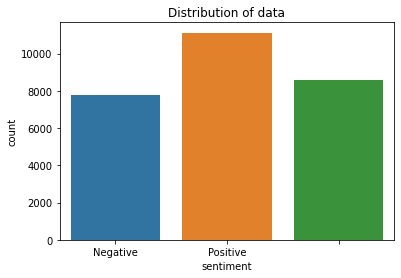

In [ ]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df_train['text']), list(df_train['sentiment'])

import seaborn as sns
ax = sns.countplot(x='sentiment', data=df_train)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# **Data Preprocessing**

In [ ]:
data=df_train[['text','sentiment']].copy()
data_test=df_test[['text','sentiment']].copy()
data

,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
...,...,...
27476,wish we could come see u on Denver husband l...,0
27477,I`ve wondered about rake to. The client has ...,0
27478,Yay good for both of you. Enjoy the break - y...,2
27479,But it was worth it ****.,2


Transform to lower class

In [ ]:
data['text'] = data['text'].str.lower()
data_test['text'] = data_test['text'].str.lower()

clean stopword

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data_test['text'] = data_test['text'].apply(lambda text: cleaning_stopwords(text))

In [ ]:
data

,text,sentiment
0,"i`d responded, going",1
1,sooo sad miss san diego!!!,0
2,boss bullying me...,0
3,interview! leave alone,0
4,"sons ****, couldn`t put releases already bought",0
...,...,...
27476,wish could come see u denver husband lost job ...,0
27477,i`ve wondered rake to. client made clear .net ...,0
27478,yay good you. enjoy break - probably need hect...,2
27479,but worth ****.,2


Cleaning and removing punctuations,numbers,url,repeat

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)


def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)       #advanced substitude

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))

data_test['text'] = data_test['text'].apply(lambda x: cleaning_punctuations(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_repeating_char(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_numbers(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_URLs(x))

In [ ]:
data

,text,sentiment
0,id responded going,1
1,sooo sad miss san diego,0
2,boss bullying me,0
3,interview leave alone,0
4,sons couldnt put releases already bought,0
...,...,...
27476,wish could come see u denver husband lost job ...,0
27477,ive wondered rake to client made clear net onl...,0
27478,yay good you enjoy break probably need hectic...,2
27479,but worth,2


**set train and test set**

In [ ]:
X_train = data.text
y_train = data.sentiment
X_test = data_test.text
y_test = data_test.sentiment

In [ ]:
X_train

0                                       id responded going
1                                  sooo sad miss san diego
2                                         boss bullying me
3                                    interview leave alone
4                sons  couldnt put releases already bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    ive wondered rake to client made clear net onl...
27478    yay good you enjoy break  probably need hectic...
27479                                           but worth 
27480                  flirting going  atg smiles yay hugs
Name: text, Length: 27481, dtype: object

1.Transforming Dataset using TF-IDF Vectorizer

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  165865


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_tfidf = vectoriser.transform(X_train)
X_test_tfidf  = vectoriser.transform(X_test)

In [ ]:
X_train_tfidf

<27481x165865 sparse matrix of type '<class 'numpy.float64'>'
	with 387758 stored elements in Compressed Sparse Row format>

# word cloud

word cloud for negative words

In [ ]:
data_pos = data[data['sentiment'] == 2]
data_neg = data[data['sentiment'] == 0]

In [ ]:
data_pos

,text,sentiment
6,am feedings baby fun smiles coos,2
9,journey wow u became cooler hehe is possible,2
11,really really like song love story taylor swift,2
21,playing ghost online really interesting new up...,2
25,free fillin app ipod fun im addicted,2
...,...,...
27467,morning twitfriends welcome new followers,2
27474,get early feel good day walk work im feeling a...,2
27475,enjoy ur night,2
27478,yay good you enjoy break probably need hectic...,2


In [ ]:
data_neg

,text,sentiment
1,sooo sad miss san diego,0
2,boss bullying me,0
3,interview leave alone,0
4,sons couldnt put releases already bought,0
12,sharpie running dangerously low ink,0
...,...,...
27464,rec gametrying not crythe pain muchi need himc...,0
27470,lol know hahadid fall asleep get bored shaun p...,0
27472,httptwitpiccomvr wanted visit animals but late,0
27476,wish could come see u denver husband lost job ...,0


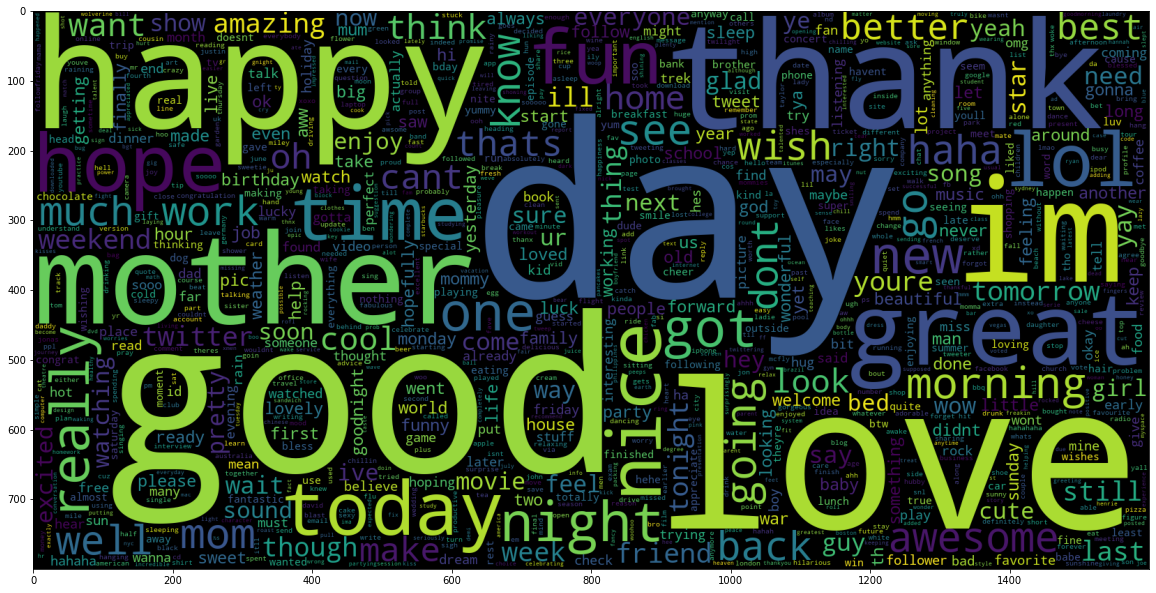

In [ ]:
data_pos_plot = data_pos['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos_plot))

plt.imshow(wc)

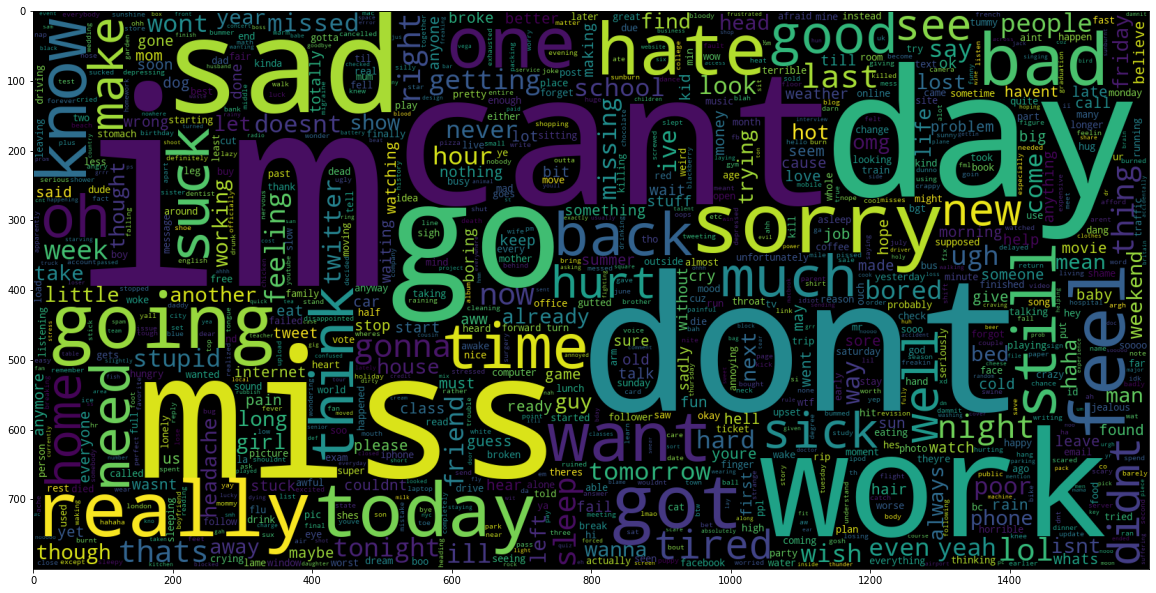

In [ ]:
data_neg_plot = data_neg['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg_plot))
plt.imshow(wc)

# Getting tokenization of tweet text

In [ ]:
from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'\w+')
tokenizer = RegexpTokenizer('\s+', gaps = True)
data['text'] = data['text'].apply(tokenizer.tokenize)
data_test['text'] = data_test['text'].apply(tokenizer.tokenize)

In [ ]:
data['text']

0                                   [id, responded, going]
1                            [sooo, sad, miss, san, diego]
2                                     [boss, bullying, me]
3                                [interview, leave, alone]
4          [sons, couldnt, put, releases, already, bought]
                               ...                        
27476    [wish, could, come, see, u, denver, husband, l...
27477    [ive, wondered, rake, to, client, made, clear,...
27478    [yay, good, you, enjoy, break, probably, need,...
27479                                         [but, worth]
27480            [flirting, going, atg, smiles, yay, hugs]
Name: text, Length: 27481, dtype: object

Applying Stemming

In [ ]:
import nltk

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
data['text']= data['text'].apply(lambda x: stemming_on_text(x))


data_test['text']= data_test['text'].apply(lambda x: stemming_on_text(x))
data['text']

0                                        [id, respond, go]
1                            [sooo, sad, miss, san, diego]
2                                        [boss, bulli, me]
3                                  [interview, leav, alon]
4             [son, couldnt, put, releas, alreadi, bought]
                               ...                        
27476    [wish, could, come, see, u, denver, husband, l...
27477    [ive, wonder, rake, to, client, made, clear, n...
27478    [yay, good, you, enjoy, break, probabl, need, ...
27479                                         [but, worth]
27480                    [flirt, go, atg, smile, yay, hug]
Name: text, Length: 27481, dtype: object

Applying Lemmatizer

In [ ]:
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data_test['text'] = data_test['text'].apply(lambda x: lemmatizer_on_text(x))

data['text']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                        [id, respond, go]
1                            [sooo, sad, miss, san, diego]
2                                         [bos, bulli, me]
3                                  [interview, leav, alon]
4             [son, couldnt, put, releas, alreadi, bought]
                               ...                        
27476    [wish, could, come, see, u, denver, husband, l...
27477    [ive, wonder, rake, to, client, made, clear, n...
27478    [yay, good, you, enjoy, break, probabl, need, ...
27479                                         [but, worth]
27480                    [flirt, go, atg, smile, yay, hug]
Name: text, Length: 27481, dtype: object

In [ ]:
data

,text,sentiment
0,"[id, respond, go]",1
1,"[sooo, sad, miss, san, diego]",0
2,"[bos, bulli, me]",0
3,"[interview, leav, alon]",0
4,"[son, couldnt, put, releas, alreadi, bought]",0
...,...,...
27476,"[wish, could, come, see, u, denver, husband, l...",0
27477,"[ive, wonder, rake, to, client, made, clear, n...",0
27478,"[yay, good, you, enjoy, break, probabl, need, ...",2
27479,"[but, worth]",2


In [ ]:
data_test

,text,sentiment
0,"[last, session, day, httptwitpiccomezh]",1
1,"[shanghai, also, realli, excit, precis, skyscr...",2
2,"[recess, hit, veroniqu, branquinho, quit, comp...",0
3,"[happi, bday]",2
4,"[httptwitpiccomwp, like, it]",2
...,...,...
3529,"[am, im, tire, but, cant, sleep, but, tri]",0
3530,"[alon, old, hous, again, thank, net, keep, ali...",2
3531,"[know, mean, littl, dog, sink, depress, want, ...",0
3532,"[sutra, next, youtub, video, gonna, about, lov...",2


# Before Training 

In [ ]:
import gensim.models

token_train = data.text
token_test = data_test.text
model_w2v = gensim.models.Word2Vec(
            token_train,
            size=400, # desired no. of features/independent variables
            window=5, # context window size
            min_count=1, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 




In [ ]:
model_w2v.wv.most_similar(positive="cant")

[('couldnt', 0.8646818399429321),
 ('wont', 0.8446467518806458),
 ('didnt', 0.8197247385978699),
 ('cannot', 0.819348931312561),
 ('tri', 0.8148715496063232),
 ('till', 0.8148069977760315),
 ('up', 0.8038234710693359),
 ('need', 0.8013210296630859),
 ('line', 0.7999664545059204),
 ('gotta', 0.796603798866272)]

 create a vector for each tweet by taking the average of the vectors or just append of the words present in the tweet.

In [ ]:
token_train

0                                        [id, respond, go]
1                            [sooo, sad, miss, san, diego]
2                                         [bos, bulli, me]
3                                  [interview, leav, alon]
4             [son, couldnt, put, releas, alreadi, bought]
                               ...                        
27476    [wish, could, come, see, u, denver, husband, l...
27477    [ive, wonder, rake, to, client, made, clear, n...
27478    [yay, good, you, enjoy, break, probabl, need, ...
27479                                         [but, worth]
27480                    [flirt, go, atg, smile, yay, hug]
Name: text, Length: 27481, dtype: object

In [ ]:
maxlength_train = max([len(token_train[i]) for i in range(len(token_train))])

In [ ]:
maxlength_train

25

In [ ]:
maxlength_test = max([len(token_test[i]) for i in range(len(token_test))])

In [ ]:
maxlength_test

22

In [ ]:
#average
def word_vector(tokens, size, maxlength):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

#all stack together

# def word_vector(tokens, size, maxlength):
#     vec = np.zeros(size*maxlength).reshape((1, size*maxlength))
#     count = 0
#     for word in tokens:
#         try:
#             # print(type(count))
#             vec[0,count*size:(count+1)*size] = model_w2v[word].reshape((1, size))
#             count += 1
            
#         except KeyError:  # handling the case where the token is not in vocabulary
#             continue
#     return vec

In [ ]:
wordvec_arrays = np.zeros((len(token_train), 400)) 
for i in range(len(token_train)):
    wordvec_arrays[i,:] = word_vector(token_train[i], 400,maxlength_train)
    wordvec_arrays[i,:] = word_vector(token_train[i], 400,maxlength_train)
wordvec_arrays_test = np.zeros((len(token_test), 400)) 
for i in range(len(token_test)):
    wordvec_arrays_test[i,:] = word_vector(token_test[i], 400,maxlength_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:

X_train_skip = pd.DataFrame(wordvec_arrays)
X_test_skip = pd.DataFrame(wordvec_arrays_test)
X_train_skip.shape
X_test_skip.shape

(3534, 400)

Show the features

In [ ]:
X_train_tfidf

<27481x165865 sparse matrix of type '<class 'numpy.float64'>'
	with 387758 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

0        1
1        0
2        0
3        0
4        0
        ..
27476    0
27477    0
27478    2
27479    2
27480    1
Name: sentiment, Length: 27481, dtype: object

In [ ]:
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
X_train_tfidf

<27481x165865 sparse matrix of type '<class 'numpy.float64'>'
	with 387758 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_tfidf)

  (0, 117569)	0.534077917931695
  (0, 117568)	0.534077917931695
  (0, 67452)	0.534077917931695
  (0, 67387)	0.3127439715175534
  (0, 52734)	0.21557722749090316
  (1, 129858)	0.3987330417401187
  (1, 129803)	0.2647386244823044
  (1, 120567)	0.3658560789119369
  (1, 120565)	0.3334827534129084
  (1, 119982)	0.37063127215005925
  (1, 119871)	0.20601163996203714
  (1, 90638)	0.42683481133017814
  (1, 90365)	0.19599790805821543
  (1, 32936)	0.3541927907359683
  (2, 87865)	0.2382077518074806
  (2, 17003)	0.5121342662698926
  (2, 17002)	0.5121342662698926
  (2, 14979)	0.5121342662698926
  (2, 14977)	0.3954902614672352
  (3, 78114)	0.5051429957661837
  (3, 78112)	0.33717349610197334
  (3, 70387)	0.5639960325586157
  (3, 70379)	0.424569054181701
  (3, 3098)	0.36440935888658904
  (4, 129571)	0.3510961126530708
  :	:
  (27478, 66786)	0.17808838933277024
  (27478, 60557)	0.2489163637806737
  (27478, 60553)	0.21929734064393527
  (27478, 54195)	0.2229419188021093
  (27478, 53677)	0.09269963664369076


In [ ]:
X_test_tfidf

<3534x165865 sparse matrix of type '<class 'numpy.float64'>'
	with 31450 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_skip

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.252538,-0.091928,-0.208203,-0.163780,-0.068078,-0.090253,-0.134224,-0.153230,-0.205184,0.176267,...,0.168163,-0.063552,0.015949,0.005175,-0.032268,0.002258,0.027909,0.012911,0.080996,0.103019
1,0.172464,-0.040954,-0.142527,-0.099748,-0.066475,-0.082749,-0.060604,-0.120135,-0.137009,0.123808,...,0.232938,-0.040378,0.049404,0.052636,-0.056721,-0.020849,0.008967,-0.005461,0.041773,0.059695
2,0.180324,-0.081485,-0.143661,-0.072115,-0.073404,-0.032322,-0.071525,-0.119626,-0.141101,0.118835,...,0.180349,-0.104653,0.045886,-0.009369,-0.045468,0.011070,0.017039,-0.045191,0.055634,0.076833
3,0.214486,-0.073473,-0.169336,-0.103547,-0.066759,-0.064457,-0.106850,-0.144351,-0.187122,0.183919,...,0.212881,-0.079548,0.010303,-0.005995,-0.073374,-0.001841,0.041653,0.046267,0.077378,0.074256
4,0.139294,-0.063007,-0.160526,-0.115463,-0.065209,-0.031524,-0.088681,-0.106111,-0.157564,0.154649,...,0.245960,-0.060005,-0.000295,0.012342,-0.064617,0.011452,0.030037,0.005954,0.058568,0.093633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,0.312115,-0.122942,-0.273283,-0.201569,-0.133132,-0.103366,-0.150121,-0.227047,-0.304703,0.232938,...,0.215000,-0.043063,0.016800,0.009033,-0.041209,0.011540,0.024221,-0.002168,0.092976,0.125703
27477,0.139142,-0.065113,-0.123578,-0.098710,-0.056398,-0.030294,-0.052288,-0.082905,-0.116165,0.117296,...,0.201848,-0.072208,0.004905,0.006751,-0.049148,0.007188,0.022054,-0.010558,0.036245,0.068761
27478,0.140331,-0.061875,-0.176186,-0.123029,-0.067651,-0.034994,-0.096705,-0.098114,-0.122365,0.134574,...,0.242723,-0.077547,-0.014118,0.042430,-0.071429,0.019490,0.048829,0.009442,0.052741,0.104879
27479,0.227622,-0.089681,-0.184154,-0.093210,-0.079020,-0.032792,-0.120450,-0.136718,-0.172126,0.185751,...,0.164124,-0.097970,0.014752,0.034243,-0.029539,0.012488,0.047868,0.025365,0.061967,0.034594


2.Function For Model Evaluation

In [ ]:
def model_Evaluate(model,X_test,y_test):   #三分类
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Netrual','Positive']
  group_names = ['True Negative','False Netrual','False Positive', 'False Negative','True Netrual','False Positive','False Negative','False Netrual','True Positive']
  group_percentages = ['\n{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}{v2}' for v1, v2 in zip(group_names,group_percentages)]
  
  labels = np.asarray(labels).reshape(3,3)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Start training

Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.89      0.06      0.11      1001
           1       0.44      0.98      0.61      1430
           2       0.92      0.23      0.37      1103

    accuracy                           0.49      3534
   macro avg       0.75      0.42      0.36      3534
weighted avg       0.72      0.49      0.39      3534



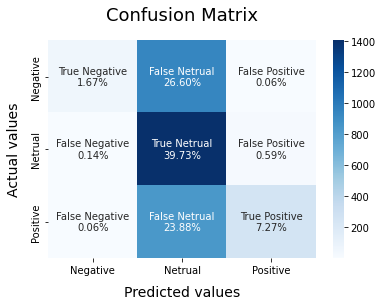

In [ ]:

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_tfidf, y_train)
model_Evaluate(BNBmodel,X_test_tfidf,y_test)

y_pred1 = BNBmodel.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.43      0.76      0.55      1001
           1       0.56      0.29      0.38      1430
           2       0.62      0.59      0.60      1103

    accuracy                           0.51      3534
   macro avg       0.54      0.54      0.51      3534
weighted avg       0.54      0.51      0.50      3534



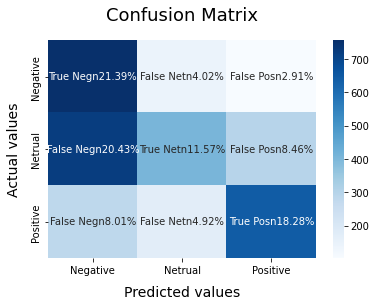

In [ ]:
BNBmodel2 = BernoulliNB()
BNBmodel2.fit(X_train_skip, y_train)
model_Evaluate(BNBmodel2,X_test_skip,y_test)
y_pred1_2 = BNBmodel2.predict(X_test_skip)

SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.svm import SVC 
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype,c,gam):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', C=c, degree=8, gamma=gam)
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', C=c, gamma=gam)
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', C=c, gamma=gam)
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', C=c)

Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1001
           1       0.66      0.69      0.67      1430
           2       0.78      0.75      0.77      1103

    accuracy                           0.71      3534
   macro avg       0.71      0.71      0.71      3534
weighted avg       0.71      0.71      0.71      3534



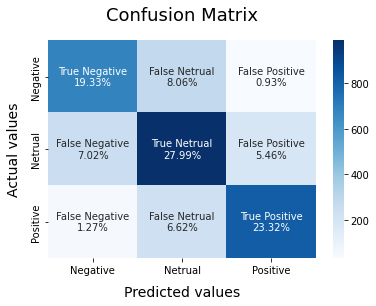

In [ ]:
C = 1
gamma = 0.1
svclassifier = getClassifier(3,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[3], "kernel", "(C=",C,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)

Evaluation: Polynomial kernel (C= 1 ,gamma= 0.1 )
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.40      1.00      0.58      1430
           2       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


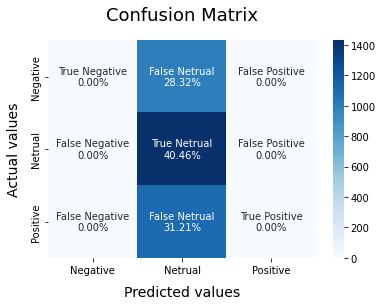

In [ ]:

C = 1
gamma = 0.1
svclassifier = getClassifier(0,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[0], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel (C= 1 ,gamma= 1 )
              precision    recall  f1-score   support

           0       0.86      0.02      0.05      1001
           1       0.41      1.00      0.58      1430
           2       0.95      0.05      0.09      1103

    accuracy                           0.43      3534
   macro avg       0.74      0.36      0.24      3534
weighted avg       0.71      0.43      0.28      3534



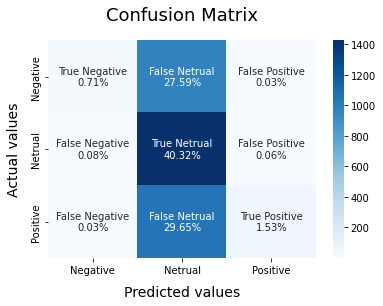

In [ ]:
C = 1
gamma = 1
svclassifier = getClassifier(0,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[0], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel (C= 1 ,gamma= 10 )
              precision    recall  f1-score   support

           0       0.88      0.02      0.04      1001
           1       0.41      1.00      0.58      1430
           2       0.94      0.04      0.08      1103

    accuracy                           0.42      3534
   macro avg       0.74      0.35      0.24      3534
weighted avg       0.71      0.42      0.27      3534



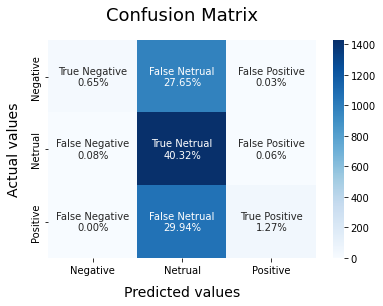

In [ ]:
C = 1
gamma = 10
svclassifier = getClassifier(0,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[0], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel (C= 0.001 ,gamma= 10 )
              precision    recall  f1-score   support

           0       0.88      0.02      0.04      1001
           1       0.41      1.00      0.58      1430
           2       0.94      0.04      0.08      1103

    accuracy                           0.42      3534
   macro avg       0.74      0.35      0.24      3534
weighted avg       0.71      0.42      0.27      3534



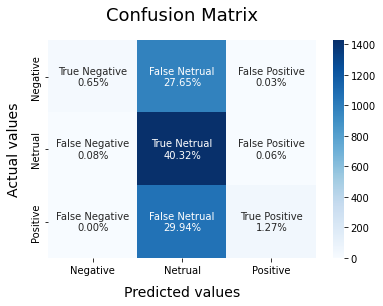

In [ ]:
C = 0.001
gamma = 10
svclassifier = getClassifier(0,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[0], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel (C= 10 ,gamma= 10 )
              precision    recall  f1-score   support

    negative       0.88      0.01      0.03      1001
     neutral       0.41      1.00      0.58      1430
    positive       0.92      0.03      0.06      1103

    accuracy                           0.42      3534
   macro avg       0.74      0.35      0.22      3534
weighted avg       0.70      0.42      0.26      3534



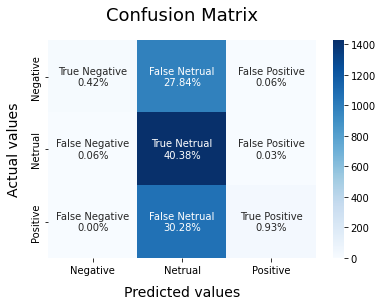

In [ ]:
C = 10
gamma = 10
svclassifier = getClassifier(0,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[0], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

In [ ]:
C = 0.001
gamma = 100
svclassifier = getClassifier(0,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[0], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 1 ,gamma= 0.1 )
              precision    recall  f1-score   support

           0       0.79      0.37      0.50      1001
           1       0.54      0.87      0.67      1430
           2       0.84      0.59      0.69      1103

    accuracy                           0.64      3534
   macro avg       0.72      0.61      0.62      3534
weighted avg       0.70      0.64      0.63      3534



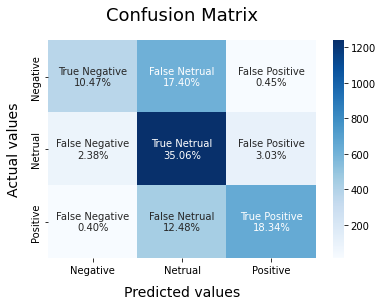

In [ ]:
C = 1
gamma = 0.1
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 1 ,gamma= 1 )
              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1001
           1       0.61      0.78      0.69      1430
           2       0.81      0.69      0.74      1103

    accuracy                           0.70      3534
   macro avg       0.72      0.68      0.70      3534
weighted avg       0.71      0.70      0.70      3534



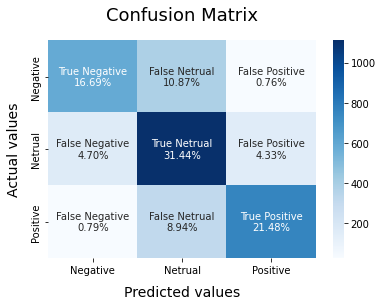

In [ ]:
C = 1
gamma = 1
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 1 ,gamma= 1 )
              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1001
           1       0.61      0.78      0.69      1430
           2       0.81      0.69      0.74      1103

    accuracy                           0.70      3534
   macro avg       0.72      0.68      0.70      3534
weighted avg       0.71      0.70      0.70      3534



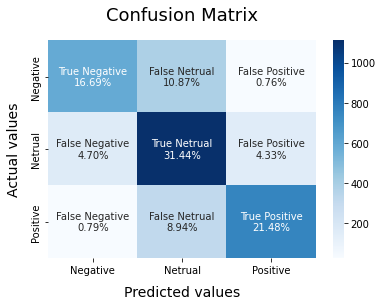

In [ ]:
C = 1
gamma = 1
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 1 ,gamma= 0.6 )
              precision    recall  f1-score   support

           0       0.76      0.59      0.67      1001
           1       0.62      0.78      0.69      1430
           2       0.81      0.70      0.75      1103

    accuracy                           0.70      3534
   macro avg       0.73      0.69      0.70      3534
weighted avg       0.72      0.70      0.70      3534



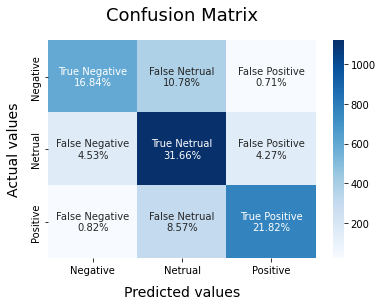

In [ ]:
C = 1
gamma = 0.6
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 1 ,gamma= 1.6 )
              precision    recall  f1-score   support

           0       0.77      0.53      0.63      1001
           1       0.59      0.82      0.69      1430
           2       0.82      0.65      0.73      1103

    accuracy                           0.68      3534
   macro avg       0.73      0.67      0.68      3534
weighted avg       0.72      0.68      0.68      3534



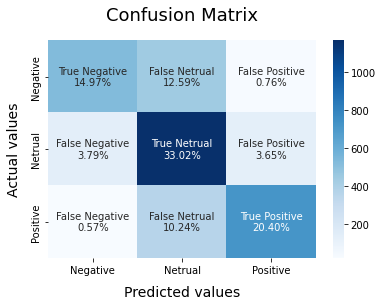

In [ ]:
C = 1
gamma =1.6
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 1 ,gamma= 10 )
              precision    recall  f1-score   support

           0       0.91      0.02      0.04      1001
           1       0.41      1.00      0.58      1430
           2       0.94      0.04      0.08      1103

    accuracy                           0.42      3534
   macro avg       0.75      0.35      0.23      3534
weighted avg       0.72      0.42      0.27      3534



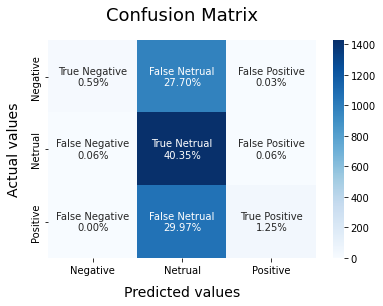

In [ ]:
C = 1
gamma = 10
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 0.0001 ,gamma= 10 )
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.40      1.00      0.58      1430
           2       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


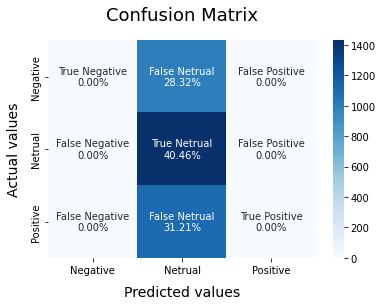

In [ ]:
C = 0.0001
gamma = 10
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: RBF kernel (C= 10 ,gamma= 10 )
              precision    recall  f1-score   support

    negative       0.83      0.01      0.03      1001
     neutral       0.41      1.00      0.58      1430
    positive       0.92      0.03      0.06      1103

    accuracy                           0.42      3534
   macro avg       0.72      0.35      0.22      3534
weighted avg       0.69      0.42      0.26      3534



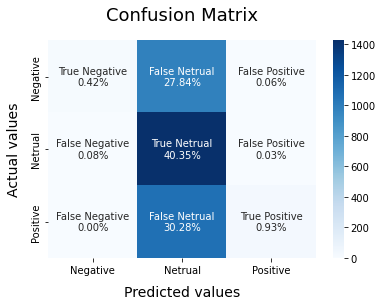

In [ ]:
C = 10
gamma = 10
svclassifier = getClassifier(1,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[1], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Sigmoid kernel (C= 1 ,gamma= 0.1 )
              precision    recall  f1-score   support

           0       0.85      0.24      0.37      1001
           1       0.50      0.92      0.65      1430
           2       0.85      0.49      0.62      1103

    accuracy                           0.59      3534
   macro avg       0.73      0.55      0.55      3534
weighted avg       0.71      0.59      0.56      3534



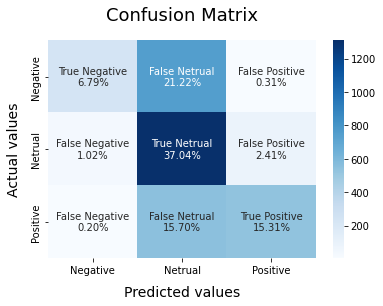

In [ ]:
C = 1
gamma = 0.1
svclassifier = getClassifier(2,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[2], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Sigmoid kernel (C= 1 ,gamma= 1 )
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1001
           1       0.66      0.72      0.69      1430
           2       0.79      0.74      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.71      0.72      3534
weighted avg       0.72      0.71      0.72      3534



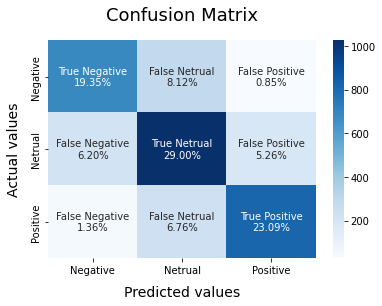

In [ ]:
C = 1
gamma = 1
svclassifier = getClassifier(2,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[2], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Sigmoid kernel (C= 10 ,gamma= 1 )
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      1001
           1       0.63      0.52      0.57      1430
           2       0.69      0.75      0.72      1103

    accuracy                           0.64      3534
   macro avg       0.64      0.65      0.64      3534
weighted avg       0.64      0.64      0.64      3534



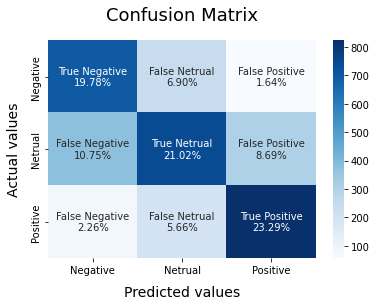

In [ ]:
C = 10
gamma = 1
svclassifier = getClassifier(2,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[2], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Sigmoid kernel (C= 1 ,gamma= 10 )
              precision    recall  f1-score   support

           0       0.48      0.81      0.61      1001
           1       0.61      0.27      0.37      1430
           2       0.65      0.74      0.69      1103

    accuracy                           0.57      3534
   macro avg       0.58      0.60      0.56      3534
weighted avg       0.59      0.57      0.54      3534



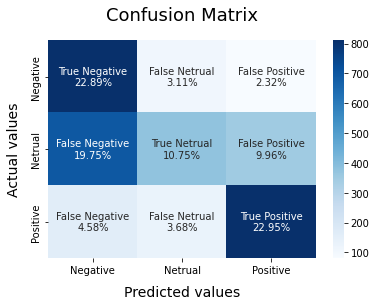

In [ ]:
C = 1
gamma = 10
svclassifier = getClassifier(2,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[2], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Sigmoid kernel (C= 0.001 ,gamma= 10 )


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1001
     neutral       0.40      1.00      0.58      1430
    positive       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



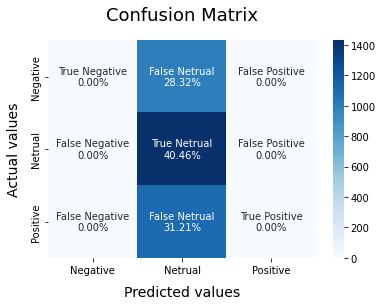

In [ ]:
C = 0.001
gamma = 10
svclassifier = getClassifier(2,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[2], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

Evaluation: Sigmoid kernel (C= 10 ,gamma= 10 )
              precision    recall  f1-score   support

           0       0.44      0.81      0.57      1001
           1       0.58      0.20      0.30      1430
           2       0.65      0.70      0.67      1103

    accuracy                           0.53      3534
   macro avg       0.56      0.57      0.52      3534
weighted avg       0.56      0.53      0.49      3534



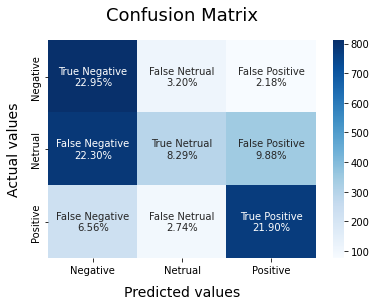

In [ ]:
C = 10
gamma = 10
svclassifier = getClassifier(2,c=C,gam=gamma) 
svclassifier.fit(X_train_tfidf, y_train)# Make prediction
print("Evaluation:", kernels[2], "kernel", "(C=",C,",gamma=",gamma ,")")
model_Evaluate(svclassifier,X_test_tfidf,y_test)
# y_pred = svclassifier.predict(X_test)# Evaluate our model
# print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1001
           1       0.66      0.63      0.64      1430
           2       0.75      0.76      0.75      1103

    accuracy                           0.69      3534
   macro avg       0.69      0.70      0.69      3534
weighted avg       0.69      0.69      0.69      3534



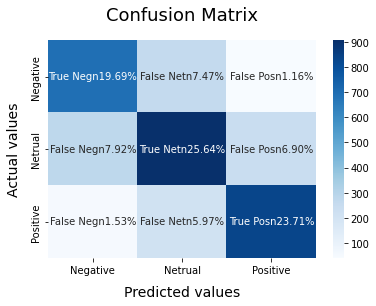

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_tfidf, y_train)
model_Evaluate(SVCmodel,X_test_tfidf,y_test)
y_pred2 = SVCmodel.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.66      0.49      0.56      1001
           1       0.57      0.71      0.63      1430
           2       0.72      0.66      0.69      1103

    accuracy                           0.63      3534
   macro avg       0.65      0.62      0.63      3534
weighted avg       0.64      0.63      0.63      3534



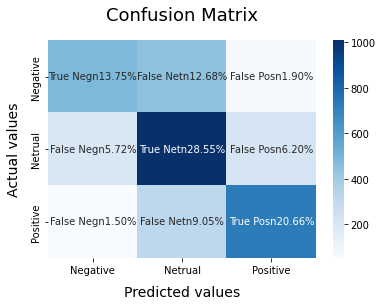

In [ ]:
SVCmodel2 = LinearSVC()
SVCmodel2.fit(X_train_skip, y_train)
model_Evaluate(SVCmodel2,X_test_skip,y_test)
y_pred2_2 = SVCmodel2.predict(X_test_skip)

LogisticRegression

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1001
           1       0.65      0.67      0.66      1430
           2       0.77      0.75      0.76      1103

    accuracy                           0.70      3534
   macro avg       0.70      0.70      0.70      3534
weighted avg       0.70      0.70      0.70      3534



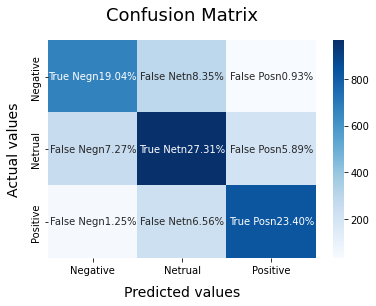

In [ ]:
LRmodel = LogisticRegression(C = 3, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_tfidf, y_train)
model_Evaluate(LRmodel,X_test_tfidf,y_test)
y_pred3 = LRmodel.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.73      0.65      0.68      1001
           1       0.64      0.73      0.68      1430
           2       0.79      0.73      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.70      0.71      3534
weighted avg       0.71      0.71      0.71      3534



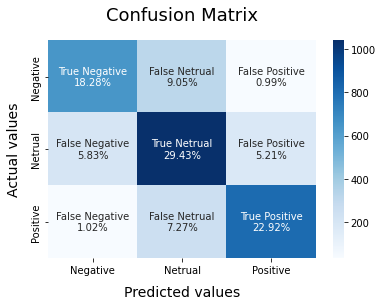

In [ ]:
LRmodel = LogisticRegression(C = 1, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_tfidf, y_train)
model_Evaluate(LRmodel,X_test_tfidf,y_test)
y_pred3 = LRmodel.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1001
           1       0.65      0.66      0.66      1430
           2       0.77      0.76      0.76      1103

    accuracy                           0.70      3534
   macro avg       0.70      0.70      0.70      3534
weighted avg       0.70      0.70      0.70      3534



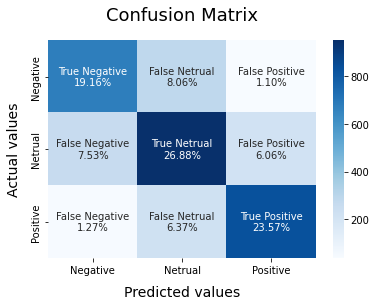

In [ ]:
LRmodel = LogisticRegression(C = 5, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_tfidf, y_train)
model_Evaluate(LRmodel,X_test_tfidf,y_test)
y_pred3 = LRmodel.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1001
           1       0.65      0.65      0.65      1430
           2       0.75      0.75      0.75      1103

    accuracy                           0.69      3534
   macro avg       0.69      0.69      0.69      3534
weighted avg       0.69      0.69      0.69      3534



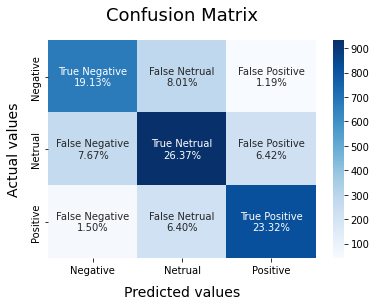

In [ ]:
LRmodel = LogisticRegression(C = 10, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_tfidf, y_train)
model_Evaluate(LRmodel,X_test_tfidf,y_test)
y_pred3 = LRmodel.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.78      0.43      0.55      1001
           1       0.56      0.84      0.67      1430
           2       0.81      0.61      0.70      1103

    accuracy                           0.65      3534
   macro avg       0.72      0.63      0.64      3534
weighted avg       0.70      0.65      0.65      3534



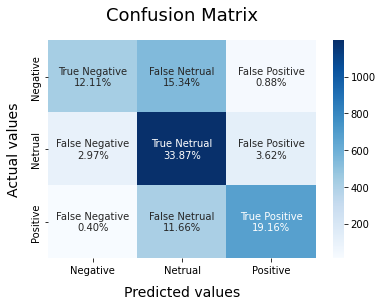

In [ ]:
LRmodel = LogisticRegression(C = 0.1, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_tfidf, y_train)
model_Evaluate(LRmodel,X_test_tfidf,y_test)
y_pred3 = LRmodel.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.64      0.49      0.55      1001
           1       0.56      0.70      0.62      1430
           2       0.73      0.65      0.68      1103

    accuracy                           0.62      3534
   macro avg       0.64      0.61      0.62      3534
weighted avg       0.63      0.62      0.62      3534



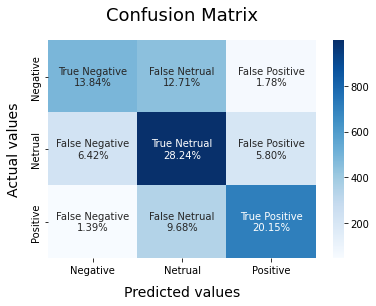

In [ ]:
LRmodel2 = LogisticRegression(C = 3, max_iter = 1000, n_jobs=-1)
LRmodel2.fit(X_train_skip, y_train)
model_Evaluate(LRmodel2,X_test_skip,y_test)
y_pred3_2 = LRmodel2.predict(X_test_skip)